In [1]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [3]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import random

In [6]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "105916",
    'client_secret': '73483d8cc7dee0aee1d0cb65d734d41f04127934',
    'refresh_token': '7eb238cedd06a1b5bfd06fe09a723fe8101ac40d',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

print("Requesting pages (200 activities per full page)...")
activities_df = pd.DataFrame()
page = 1
page_non_empty = True
while page_non_empty:
    header = {'Authorization': 'Bearer ' + access_token}
    param = {'per_page': 200, 'page': page}
    my_activities = requests.get(activites_url, headers=header, params=param).json()
    
    # Normalize the JSON data and concatenate it to the DataFrame
    if my_activities:
        activities_df = pd.concat([activities_df, json_normalize(my_activities)], ignore_index=True)
        
    page_non_empty = bool(my_activities)
    print(page)
    page += 1

print("\n", len(activities_df), "activities downloaded")

Requesting Token...

Access Token = 377f9d25680df3e7cd4eb3225b0003fcb4482f94

Requesting pages (200 activities per full page)...
1
2
3
4
5
6
7

 1062 activities downloaded


In [8]:
activities_df.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'id', 'start_date',
       'start_date_local', 'timezone', 'utc_offset', 'location_city',
       'location_state', 'location_country', 'achievement_count',
       'kudos_count', 'comment_count', 'athlete_count', 'photo_count',
       'trainer', 'commute', 'manual', 'private', 'visibility', 'flagged',
       'gear_id', 'start_latlng', 'end_latlng', 'average_speed', 'max_speed',
       'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'workout_type',
       'average_cadence', 'average_temp', 'average_watts', 'device_watts',
       'kilojou

Text(0.5, 1.0, 'Number of activities per year')

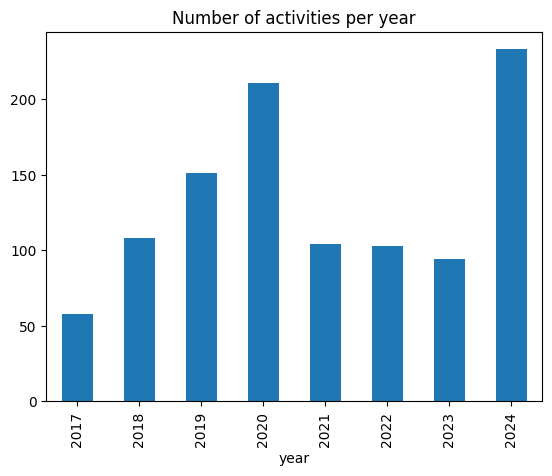

In [12]:
# make bar chart per year of activities_df['sport_type']
activities_df['start_date'] = pd.to_datetime(activities_df['start_date'])
activities_df['year'] = activities_df['start_date'].dt.year

activities_df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of activities per year')

Text(0.5, 1.0, 'Number of activities per sport type')

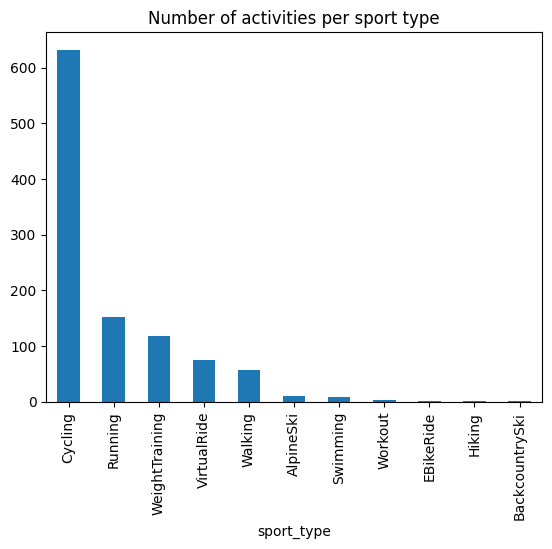

In [ ]:
# Make grouped bar chart per year of activities_df['sport_type']
activities_df['sport_type'].value_counts().plot(kind='bar')
plt.title('Number of activities per sport type')